# 3. CK+ Dataset 전처리 

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

### 3.1. 전처리에 사용될 하이퍼 패러미터 선언

In [2]:
# Constants for CKPLUS dataset
CKPLUS_IN_DIR = "datasets/CK+48/raw/"
CKPLUS_OUT_DIR = "datasets/CK+48/prep/"
CKPLUS_WIDTH = 48
CKPLUS_HEIGHT = 48

In [3]:
data = pd.DataFrame(columns=['emotion', 'pixels'])

Happy와 Sad만 추출

In [4]:
# Happy
for (path, dir, files) in os.walk(CKPLUS_IN_DIR + 'happy'):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.png':
            images = cv2.imread(path + '/' + filename, cv2.IMREAD_GRAYSCALE).flatten()
            new_dict = pd.Series({"emotion" : '0', "pixels": images})
            data = data.append(new_dict, ignore_index=True)

# Sad
for (path, dir, files) in os.walk(CKPLUS_IN_DIR + 'sadness'):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.png':
            images = cv2.imread(path + '/' + filename, cv2.IMREAD_GRAYSCALE).flatten()
            new_dict = pd.Series({"emotion" : '1', "pixels": images})
            data = data.append(new_dict, ignore_index=True)
            
data.head()

,emotion,pixels
0,0,"[86, 86, 86, 135, 230, 250, 255, 255, 214, 120..."
1,0,"[36, 36, 37, 34, 21, 3, 0, 0, 0, 0, 2, 19, 54,..."
2,0,"[32, 8, 1, 4, 8, 5, 2, 6, 9, 12, 19, 17, 13, 1..."
3,0,"[6, 0, 0, 0, 0, 8, 15, 12, 10, 15, 26, 29, 14,..."
4,0,"[19, 17, 16, 21, 34, 31, 29, 37, 43, 45, 72, 1..."


### 3.2. CK+ Dataset의 구성

In [5]:
Emotions = ["Happy", "Sad"]

In [6]:
data["emotion"].value_counts(sort=False)

0    207
1     84
Name: emotion, dtype: int64

### 3.3. 샘플 데이터 확인

In [7]:
def CKPlus_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(data.at[index, "pixels"], (CKPLUS_WIDTH, CKPLUS_HEIGHT)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(Emotions[int(data.at[index, "emotion"])])
    plt.imshow(image, cmap="gray")

Happy


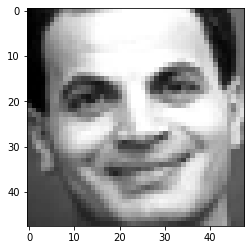

In [8]:
CKPlus_show_instance(np.random.randint(90,len(data)))

### 1.4. Dataset의 4D Array화

In [9]:
def CKPlus_to_X():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = data["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels, (CKPLUS_WIDTH, CKPLUS_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    
    return X

In [10]:
# Get features (image data)
X = CKPlus_to_X()
X.shape

(291, 48, 48, 1)

In [11]:
# Get labels (one-hot encoded)
y = pd.get_dummies(data['emotion']).values
y.shape

(291, 2)

In [12]:
# Save data
np.save(CKPLUS_OUT_DIR  + "CKPlus_X", X)
np.save(CKPLUS_OUT_DIR  + "CKPlus_y", y)